<a href="https://colab.research.google.com/github/DavideScassola/data_analysys_laboratory/blob/main/notebooks/introduzione_a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduzione a Pandas

_pandas_ è una libreria Python per fare analisi dei dati.

Pandas introduce due strutture dati:
- **Series**: una lista di dati con un indice.
- **Data frame**: una tabella formata da diverse colonne (Series), ognuna con un nome.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Come esempio, creiamo una serie senza specificare l'indice:
s = pd.Series([7, 'Hello world', 42.26])
print("serie con indice di default: ")
print(s)

serie con indice di default: 
0              7
1    Hello world
2          42.26
dtype: object


In [3]:
# Possiamo anche specificare l'indice:
serie_con_indice = pd.Series([7, 'Hello world', 42.26], index=['A', 'B', 'C'])
print("\nSerie con indice personalizzato: ")
print(serie_con_indice)


Serie con indice personalizzato: 
A              7
B    Hello world
C          42.26
dtype: object


In [4]:
# Possiamo accedere agli elementi della serie tramite l'indice. Questo è molto simile a come funziona un dizionario
print(s[1])
print(serie_con_indice['A'])

Hello world
7


In [5]:
# Possiamo anche selezionare più elementi della serie tramite una lista di indici:
print(s[[0, 2]])

0        7
2    42.26
dtype: object


In [6]:
# Le serie sono utili perchè permettono di applicare facilmente operazioni ad ogni elemento:
citta = pd.Series([2.9, 0.262, 0.204, 0.887],
              index=['Roma', 'Venezia', 'Trieste', 'Torino'])

citta*2

Roma       5.800
Venezia    0.524
Trieste    0.408
Torino     1.774
dtype: float64

In [7]:
citta>0.3

Roma        True
Venezia    False
Trieste    False
Torino      True
dtype: bool

In [8]:
# possiamo usare una lista di booleani per selezionare solo alcuni elementi della serie:
# in questo caso, selezioniamo solo le città con più di 0.3 milioni di abitanti
citta[citta>0.3]

Roma      2.900
Torino    0.887
dtype: float64

In [9]:
# possiamo anche modificare e aggiungere dei valori alla serie:
citta['Roma'] = 3.0 
citta['Livorno'] = 0.159

print(citta)

Roma       3.000
Venezia    0.262
Trieste    0.204
Torino     0.887
Livorno    0.159
dtype: float64


### DataFrame
Un Dataframe è una tabella, cioè un insieme di colonne con un nome. Le colonne di un Dataframe sono infatti delle Series.

Possiamo construire un dataframe a mano, costruendo ogni singola colonna:

In [10]:
data = {'letters':['A', 'B', 'C', 'D'],
       'numbers':[1, 2, 3, 4],
       'spelling': ['One', 'Two', 'Three', 'Four']}
letters_numbers = pd.DataFrame(data, columns=['letters', 'numbers', 'spelling'])
letters_numbers

,letters,numbers,spelling
0,A,1,One
1,B,2,Two
2,C,3,Three
3,D,4,Four


Più spesso abbiamo un dataset contenuto in un file (ad esempio .csv o un excel) e lo vogliamo importare come dataframe. Pandas permette non solo di caricare un dataset da un file locale, ma anche dataset in rete se viene fornito un link!

In [11]:
# import csv dataset
path_csv = 'https://raw.githubusercontent.com/GaiaSaveri/intro-to-ml/main/data/ign.csv'
reviews = pd.read_csv(path_csv, index_col=0)
reviews

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
...,...,...,...,...,...,...,...,...,...,...
18620,Good,Tokyo Mirage Sessions #FE,/games/fire-emblem-x-shin-megami-tensei/wii-u-...,Wii U,7.6,RPG,N,2016,6,29
18621,Amazing,LEGO Star Wars: The Force Awakens,/games/lego-star-wars-the-force-awakens/ps4-20...,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,Mediocre,Star Ocean: Integrity and Faithlessness,/games/star-ocean-5/ps4-20035681,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28


Possiamo vedere un dataframe come un dizionario di Series:

In [12]:
print("colonne: ", reviews.columns)

reviews['title']

colonne:  Index(['score_phrase', 'title', 'url', 'platform', 'score', 'genre',
       'editors_choice', 'release_year', 'release_month', 'release_day'],
      dtype='object')


0                                  LittleBigPlanet PS Vita
1        LittleBigPlanet PS Vita -- Marvel Super Hero E...
2                                     Splice: Tree of Life
3                                                   NHL 13
4                                                   NHL 13
                               ...                        
18620                            Tokyo Mirage Sessions #FE
18621                    LEGO Star Wars: The Force Awakens
18622              Star Ocean: Integrity and Faithlessness
18623                                               Inside
18624                                               Inside
Name: title, Length: 18625, dtype: object

Come per le serie, possiamo selezionare delle righe di un dataframe tramite una lista di indici:

In [13]:
reviews.loc[[45,15,160]]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
45,Amazing,Bad Piggies,/games/bad-piggies/iphone-141455,iPhone,9.2,Action,Y,2012,10,1
15,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/mac-2001...,Macintosh,6.5,Adventure,N,2012,9,6
160,Good,10000000,/games/10000000/iphone-139135,iPhone,7.5,NaN,N,2012,8,9


Oppure possiamo selezionare un sottoinsieme di righe e colonne in base all'ordine:

In [14]:
# seleziona un sottoinsieme di colonne e righe
reviews.iloc[0:10, 0:2] # prime dieci righe, prime due colonne

,score_phrase,title
0,Amazing,LittleBigPlanet PS Vita
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...
2,Great,Splice: Tree of Life
3,Great,NHL 13
4,Great,NHL 13
5,Good,Total War Battles: Shogun
6,Awful,Double Dragon: Neon
7,Amazing,Guild Wars 2
8,Awful,Double Dragon: Neon
9,Good,Total War Battles: Shogun


In [15]:
# seleziona un sottoinsieme di colonne e righe
reviews.loc[0:10, ["title", "score"]]

,title,score
0,LittleBigPlanet PS Vita,9.0
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,9.0
2,Splice: Tree of Life,8.5
3,NHL 13,8.5
4,NHL 13,8.5
5,Total War Battles: Shogun,7.0
6,Double Dragon: Neon,3.0
7,Guild Wars 2,9.0
8,Double Dragon: Neon,3.0
9,Total War Battles: Shogun,7.0


In [16]:
# seleziona un sottoinsieme di colonne tenendo tutte le righe
reviews[["title", "score"]]

,title,score
0,LittleBigPlanet PS Vita,9.0
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,9.0
2,Splice: Tree of Life,8.5
3,NHL 13,8.5
4,NHL 13,8.5
...,...,...
18620,Tokyo Mirage Sessions #FE,7.6
18621,LEGO Star Wars: The Force Awakens,9.0
18622,Star Ocean: Integrity and Faithlessness,5.8
18623,Inside,10.0


In [17]:
# come per le serie, possiamo selezionare solo alcune righe attraverso una lista di booleani
mask = reviews["score"] >= 9.5 
mask # series of booleans

0        False
1        False
2        False
3        False
4        False
         ...  
18620    False
18621    False
18622    False
18623     True
18624     True
Name: score, Length: 18625, dtype: bool

In [18]:
# seleziona solo i videogiochi con score >= 9.5
reviews[reviews["score"] >= 9.5]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
33,Amazing,Pokemon White Version 2,/games/pokemon-white-version-2/nds-129228,Nintendo DS,9.6,RPG,Y,2012,10,3
35,Amazing,Pokemon Black Version 2,/games/pokemon-black-version-2/nds-129224,Nintendo DS,9.6,RPG,Y,2012,10,3
52,Amazing,The World Ends with You: Solo Remix,/games/the-world-ends-with-you-solo-remix/ipad...,iPad,9.5,RPG,Y,2012,8,27
54,Amazing,The World Ends with You: Solo Remix,/games/the-world-ends-with-you-solo-remix/ipho...,iPhone,9.5,RPG,Y,2012,8,27
135,Amazing,Zero Escape: Virtue's Last Reward,/games/virtues-last-reward/3ds-116383,Nintendo 3DS,9.5,Adventure,Y,2012,10,23
...,...,...,...,...,...,...,...,...,...,...
18511,Masterpiece,Inside,/games/inside-playdead/ps4-20056859,PlayStation 4,10.0,Adventure,Y,2016,6,28
18562,Amazing,Odin Sphere Leifthrasir,/games/odin-sphere-leifthrasir/ps4-20040524,PlayStation 4,9.5,RPG,Y,2016,6,1
18563,Amazing,Odin Sphere Leifthrasir,/games/odin-sphere-leifthrasir/vita-20040525,PlayStation Vita,9.5,RPG,Y,2016,6,1
18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28


Le seguenti sono funzioni che permettono di calcolare varie informazioni e statistiche su Dataframe e Series:

In [19]:
# Informazioni sulle colonne di un DataFrame
reviews.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 18625 entries, 0 to 18624
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   score_phrase    18625 non-null  object 
 1   title           18625 non-null  object 
 2   url             18625 non-null  object 
 3   platform        18625 non-null  object 
 4   score           18625 non-null  float64
 5   genre           18589 non-null  object 
 6   editors_choice  18625 non-null  object 
 7   release_year    18625 non-null  int64  
 8   release_month   18625 non-null  int64  
 9   release_day     18625 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 2.1+ MB


In [20]:
print('media score: ', reviews['score'].mean())
print('mediana score: ', reviews['score'].median())
print('massimo score: ', reviews['score'].max())

media score:  6.950459060402685
mediana score:  7.3
massimo score:  10.0


## Visualizzare i dati

La libreria più utilizzata per fare grafici è matplotlib

In [21]:
import matplotlib.pyplot as plt

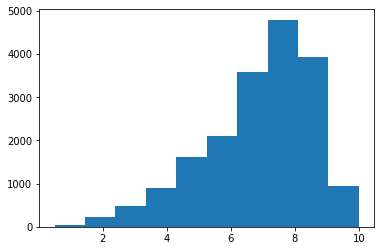

In [22]:
# istogramma
_ = plt.hist(reviews["score"])

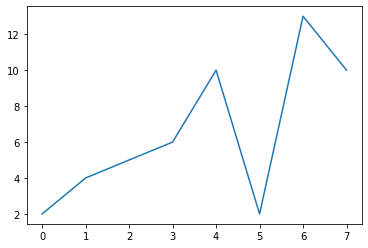

In [23]:
# mostrare una serie di numeri (sull'asse x viene messo l'indice)
y = [2, 4, 5, 6, 10, 2, 13, 10]
_ = plt.plot(y)

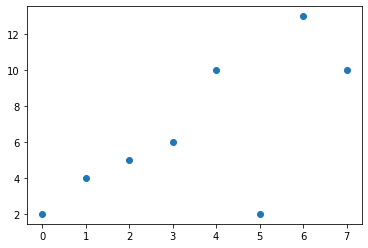

In [24]:
# possiamo modificare lo stile del grafico
_ = plt.plot(y, 'o')

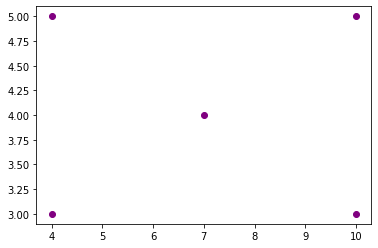

In [25]:
# Possiamo mostrare una serie di coordinate (x, y)
x = [10, 10, 4, 4, 7]
y = [5, 3, 5, 3, 4]

_ = plt.plot(x, y, 'o', color='purple')